# 110學年度，淡江大學資料壓縮期末報告
報告內容：壓縮程式解析說明 <br>
要求：python 程式碼，必須註明出處 <br>
建議：使用 JupyterNotebook 整理及說明(+5分 <br>
錄製說明影片：依解說清楚詳盡與否，額外增加(1~5分) <br>
資料來源: https://github.com/arnab132/Huffman-Coding-Python
___

## 使用python進行霍夫曼編碼 (Huffman Coding using python)

In [1]:
string = 'BCAADDDCCACACAC'

## 創建樹節點 (Creating tree nodes)

In [2]:
class NodeTree(object):

    def __init__(self, left=None, right=None):
        self.left = left
        self.right = right

    def children(self):
        return (self.left, self.right)

#     def nodes(self):
#         return (self.left, self.right)

#     def __str__(self):
#         return '%s_%s' % (self.left, self.right)

## 實現霍夫曼編碼的主要功能 (Main function implementing huffman coding)

In [3]:
def huffman_code_tree(node, left=True, binString=''):
    if type(node) is str:
        return {node: binString}
    (l, r) = node.children()
    d = dict()
    d.update(huffman_code_tree(l, True, binString + '0'))
    d.update(huffman_code_tree(r, False, binString + '1'))
    return d

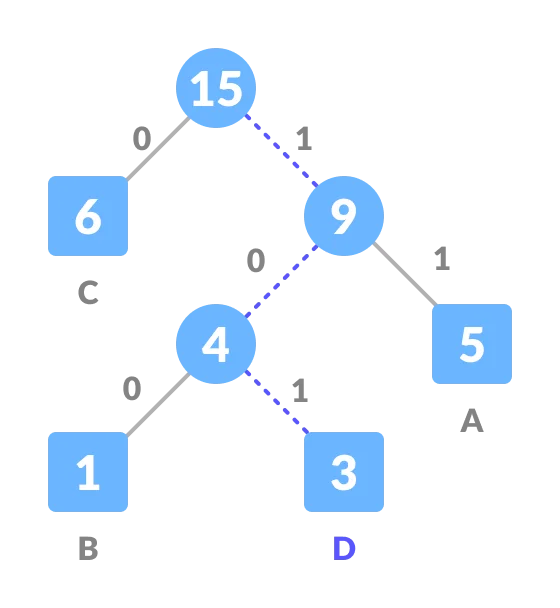

## 計算頻率 (Calculating frequency)

In [4]:
print(string)

BCAADDDCCACACAC


In [5]:
freq = {}
for c in string:
    if c in freq:
        freq[c] += 1
    else:
        freq[c] = 1
print(freq)

{'B': 1, 'C': 6, 'A': 5, 'D': 3}


### 依照頻率排序

In [6]:
freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)
print(freq)

[('C', 6), ('A', 5), ('D', 3), ('B', 1)]


### 生成Huffman Tree的過程

In [7]:
nodes = freq
while len(nodes) > 1:
    print(nodes)
    (key1, c1) = nodes[-1]
    (key2, c2) = nodes[-2]
    nodes = nodes[:-2]
    print(nodes)
    node = NodeTree(key1, key2)
    nodes.append((node, c1 + c2))
    print(nodes)
    nodes = sorted(nodes, key=lambda x: x[1], reverse=True)
    print(nodes, "\n")

[('C', 6), ('A', 5), ('D', 3), ('B', 1)]
[('C', 6), ('A', 5)]
[('C', 6), ('A', 5), (<__main__.NodeTree object at 0x000001A4174902C8>, 4)]
[('C', 6), ('A', 5), (<__main__.NodeTree object at 0x000001A4174902C8>, 4)] 

[('C', 6), ('A', 5), (<__main__.NodeTree object at 0x000001A4174902C8>, 4)]
[('C', 6)]
[('C', 6), (<__main__.NodeTree object at 0x000001A417490188>, 9)]
[(<__main__.NodeTree object at 0x000001A417490188>, 9), ('C', 6)] 

[(<__main__.NodeTree object at 0x000001A417490188>, 9), ('C', 6)]
[]
[(<__main__.NodeTree object at 0x000001A417490488>, 15)]
[(<__main__.NodeTree object at 0x000001A417490488>, 15)] 



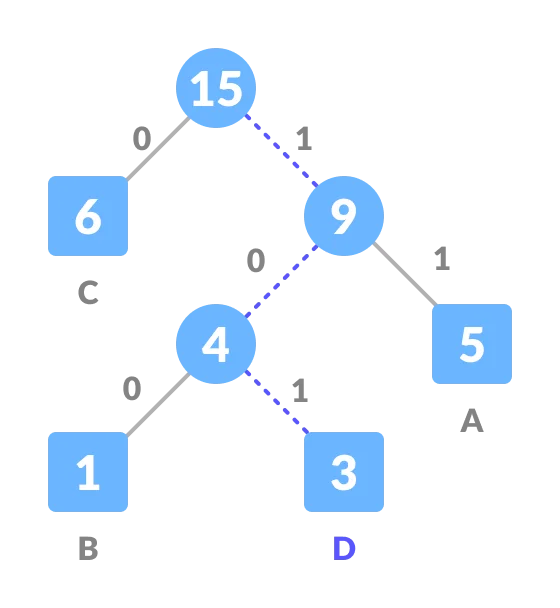

In [8]:
print(nodes[0][0])

In [9]:
huffmanCode = huffman_code_tree(nodes[0][0])
print(huffmanCode)

{'C': '0', 'B': '100', 'D': '101', 'A': '11'}


In [10]:
print(' Char | Huffman code ')
print('----------------------')
for (char, frequency) in freq:
    print(' %-4r |%12s' % (char, huffmanCode[char]))

 Char | Huffman code 
----------------------
 'C'  |           0
 'A'  |          11
 'D'  |         101
 'B'  |         100


## 顯示結果

In [11]:
print(string + "\n")
for char in string:
    print('%s ' % (huffmanCode[char]), end = '')

BCAADDDCCACACAC

100 0 11 11 101 101 101 0 0 11 0 11 0 11 0 